<a href="https://colab.research.google.com/github/cmlohr/research_data/blob/add-license-1/Movie_Budget_and_Financial_Performance_Records_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Budget and Financial Performance Records

Exploring movie industry budge financal data from 2018.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [5]:
data = pd.read_csv('cost_revenue_dirty.csv')

In [6]:
data.shape

(5391, 6)

In [7]:
data.head()


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [8]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [10]:
data.sample()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4903,3698,5/15/2015,Pound of Flesh,"$7,500,000",$0,$0


# Exploring and Cleaning the Data

In [11]:
data.isna().values.any()

False

In [12]:
data.duplicated().values.any()


False

In [13]:
    duplicated_rows = data[data.duplicated()]
    len(duplicated_rows)

0

### Data Type Conversions

In [14]:
    chars_to_remove = [',', '$']
    columns_to_clean = ['USD_Production_Budget', 
                        'USD_Worldwide_Gross',
                        'USD_Domestic_Gross']
     
    for col in columns_to_clean:
        for char in chars_to_remove:
            # Replace each character with an empty string
            data[col] = data[col].astype(str).str.replace(char, "")
        # Convert column to a numeric data type
        data[col] = pd.to_numeric(data[col])

In [15]:
data.Release_Date = pd.to_datetime(data.Release_Date)

In [16]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

In [18]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


# Investigating the Zero Revenue Films

In [19]:
data[data.USD_Production_Budget == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [20]:
data[data.USD_Production_Budget == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [21]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

Number of films that grossed $0 domestically 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


### Filtering on Multiple Conditions

In [22]:
    international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
    print(f'Number of international releases: {len(international_releases)}')
    international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


In [25]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [26]:
future_releases = data[data.Release_Date >= scrape_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [27]:
data_clean = data.drop(future_releases.index)

In [28]:
    money_losing = data_clean.loc[data_clean.USD_Production_Budget > data_clean.USD_Worldwide_Gross]
    len(money_losing)/len(data_clean)
    

0.37277117384843983

# Seaborn for Data Viz: Bubble Charts

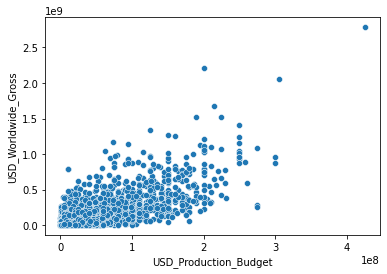

In [30]:
    sns.scatterplot(data=data_clean,
                    x='USD_Production_Budget', 
                    y='USD_Worldwide_Gross')

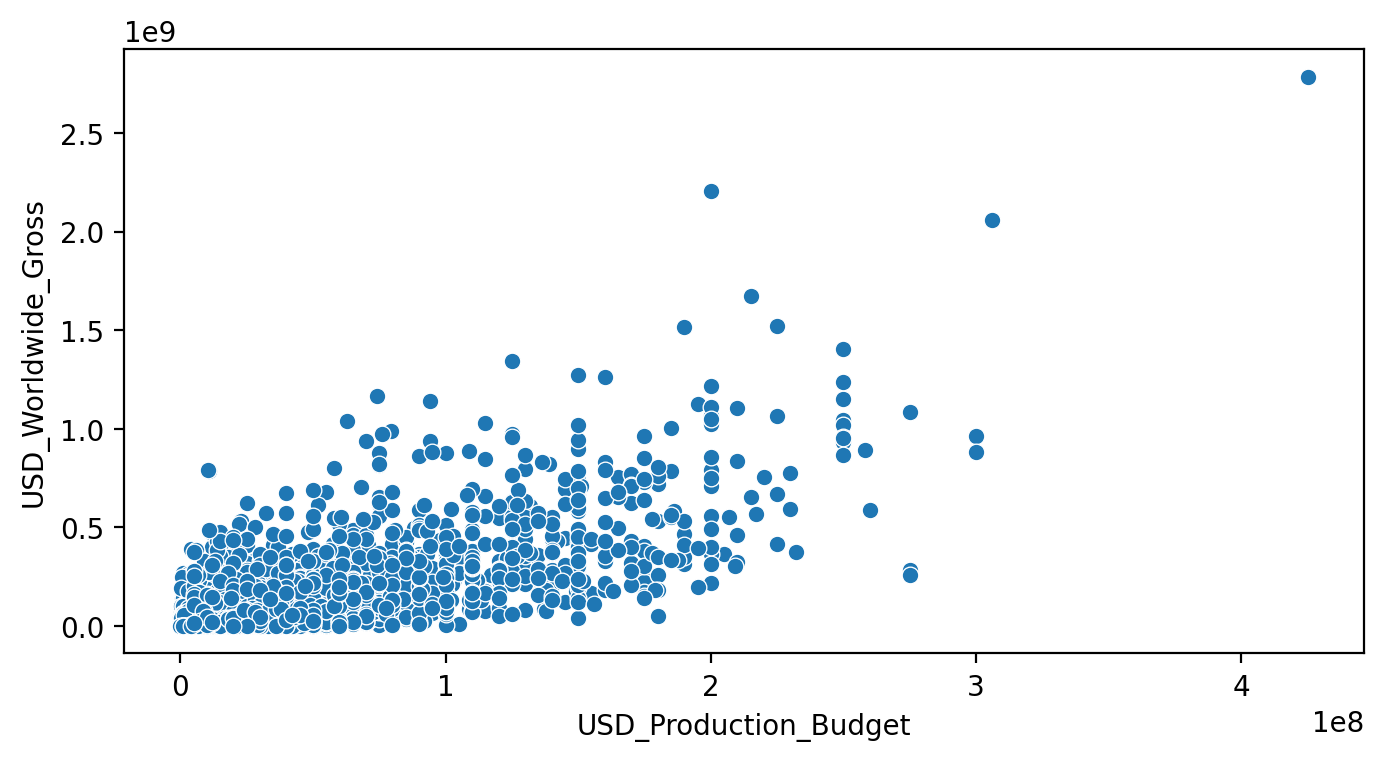

In [31]:
plt.figure(figsize=(8,4), dpi=200)

sns.scatterplot(data=data_clean, x='USD_Production_Budget', y='USD_Worldwide_Gross')

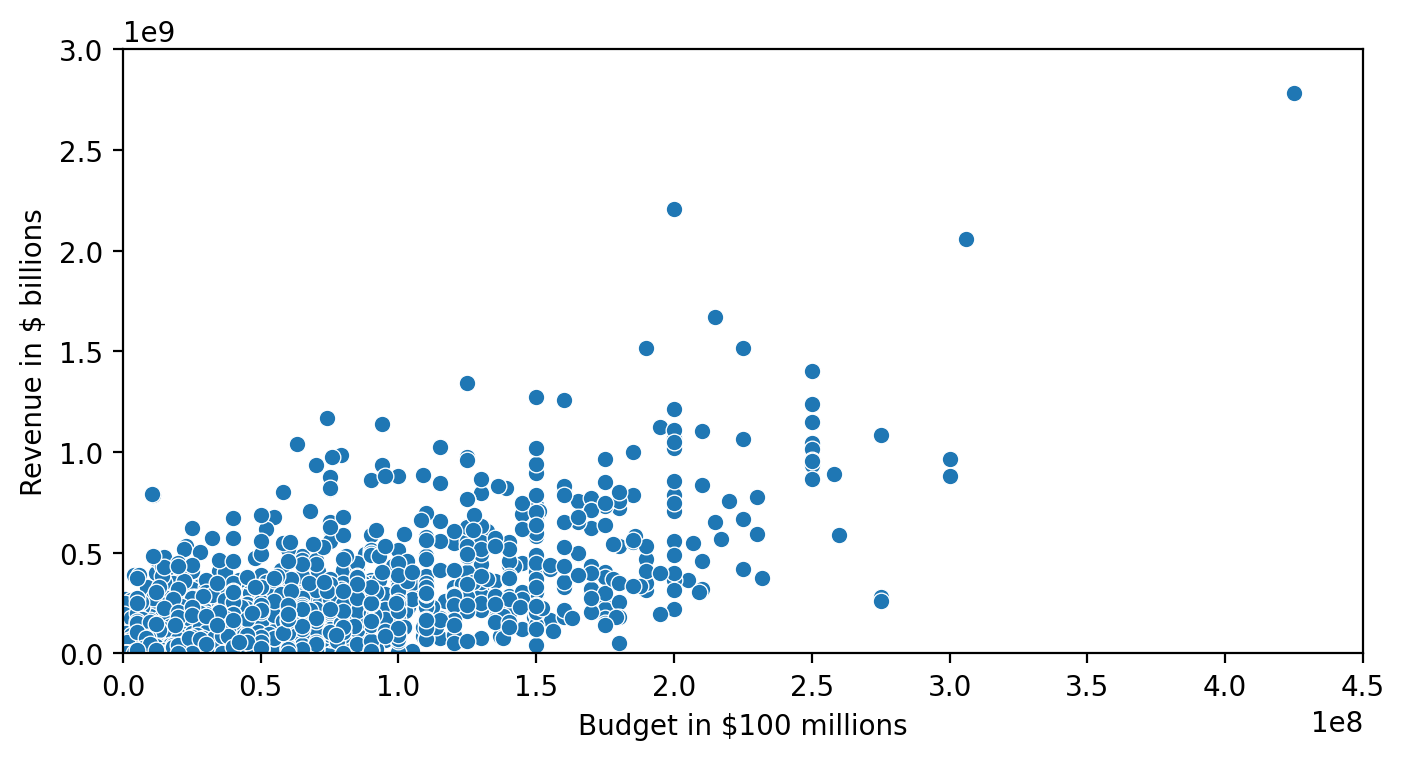

In [32]:
    plt.figure(figsize=(8,4), dpi=200)
     
    ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross')
     
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')
     
    plt.show()

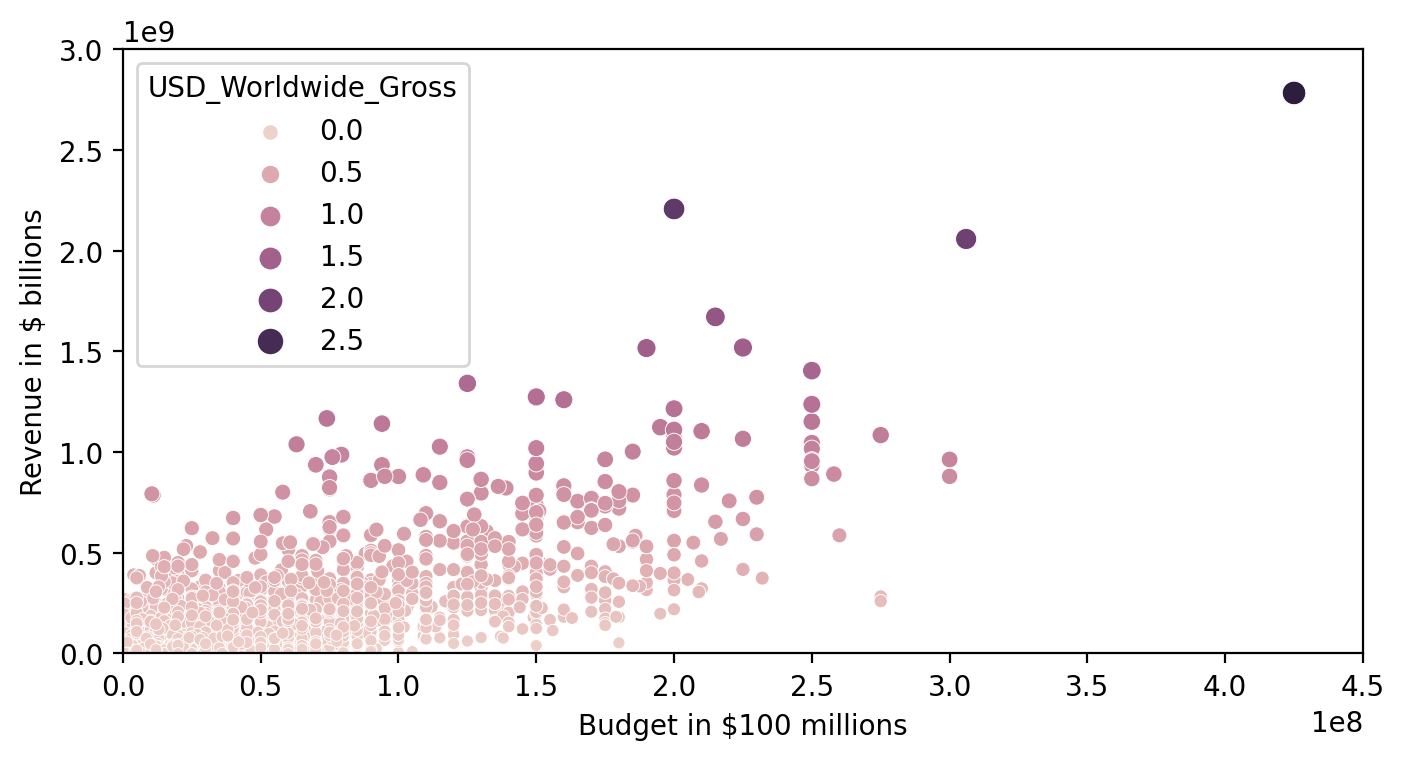

In [33]:
    plt.figure(figsize=(8,4), dpi=200)
    ax = sns.scatterplot(data=data_clean,
                         x='USD_Production_Budget', 
                         y='USD_Worldwide_Gross',
                         hue='USD_Worldwide_Gross', # colour
                         size='USD_Worldwide_Gross',) # dot size
     
    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions',)
     
    plt.show()

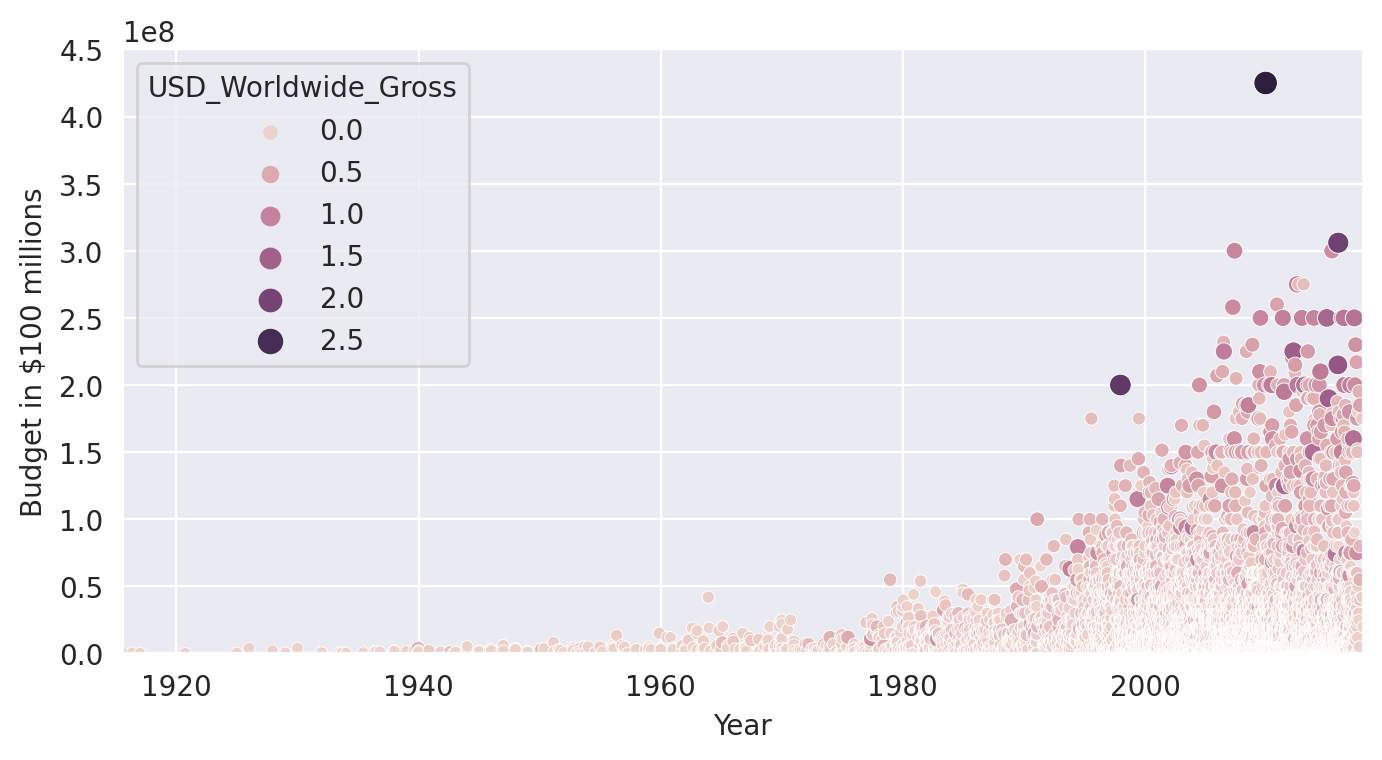

In [35]:
plt.figure(figsize=(8,4), dpi=200)
 
with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)
 
    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

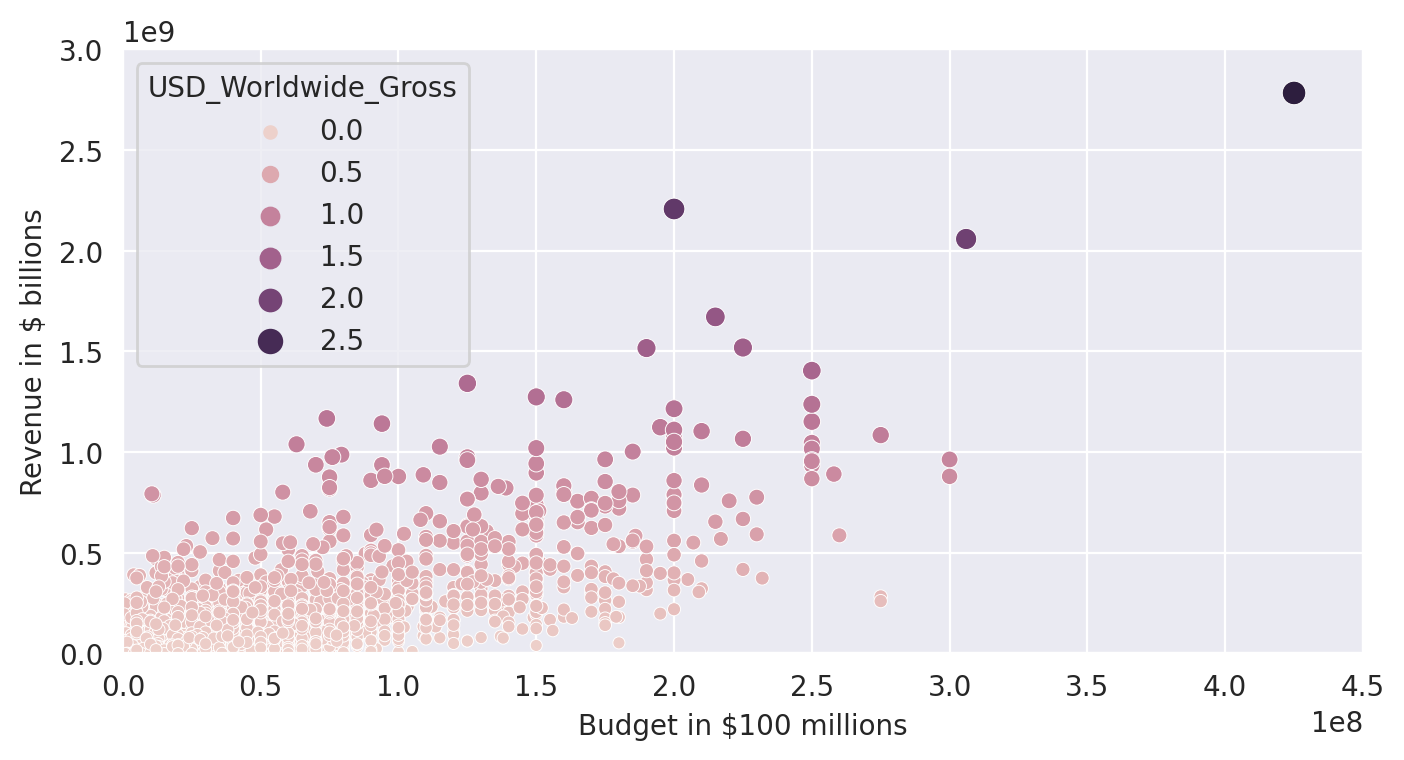

In [34]:
    plt.figure(figsize=(8,4), dpi=200)
     
    # set styling on a single chart
    with sns.axes_style('darkgrid'):
      ax = sns.scatterplot(data=data_clean,
                           x='USD_Production_Budget', 
                           y='USD_Worldwide_Gross',
                           hue='USD_Worldwide_Gross',
                           size='USD_Worldwide_Gross')
     
      ax.set(ylim=(0, 3000000000),
            xlim=(0, 450000000),
            ylabel='Revenue in $ billions',
            xlabel='Budget in $100 millions')

In [36]:
    dt_index = pd.DatetimeIndex(data_clean.Release_Date)
    years = dt_index.year

In [37]:
    5.0 / 2
    # output: 2.5
    5.0 // 2
    # output: 2.0

2.0

In [38]:
    decades = years//10*10
    data_clean['Decade'] = decades

In [39]:
    old_films = data_clean[data_clean.Decade <= 1960]
    new_films = data_clean[data_clean.Decade > 1960]

In [40]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [42]:
old_films.sort_values("USD_Production_Budget", ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

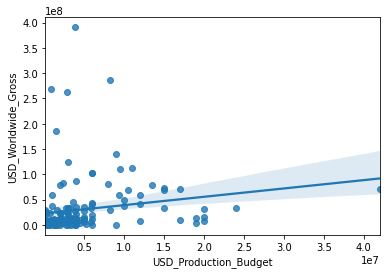

In [43]:
    sns.regplot(data=old_films, 
                x='USD_Production_Budget',
                y='USD_Worldwide_Gross')

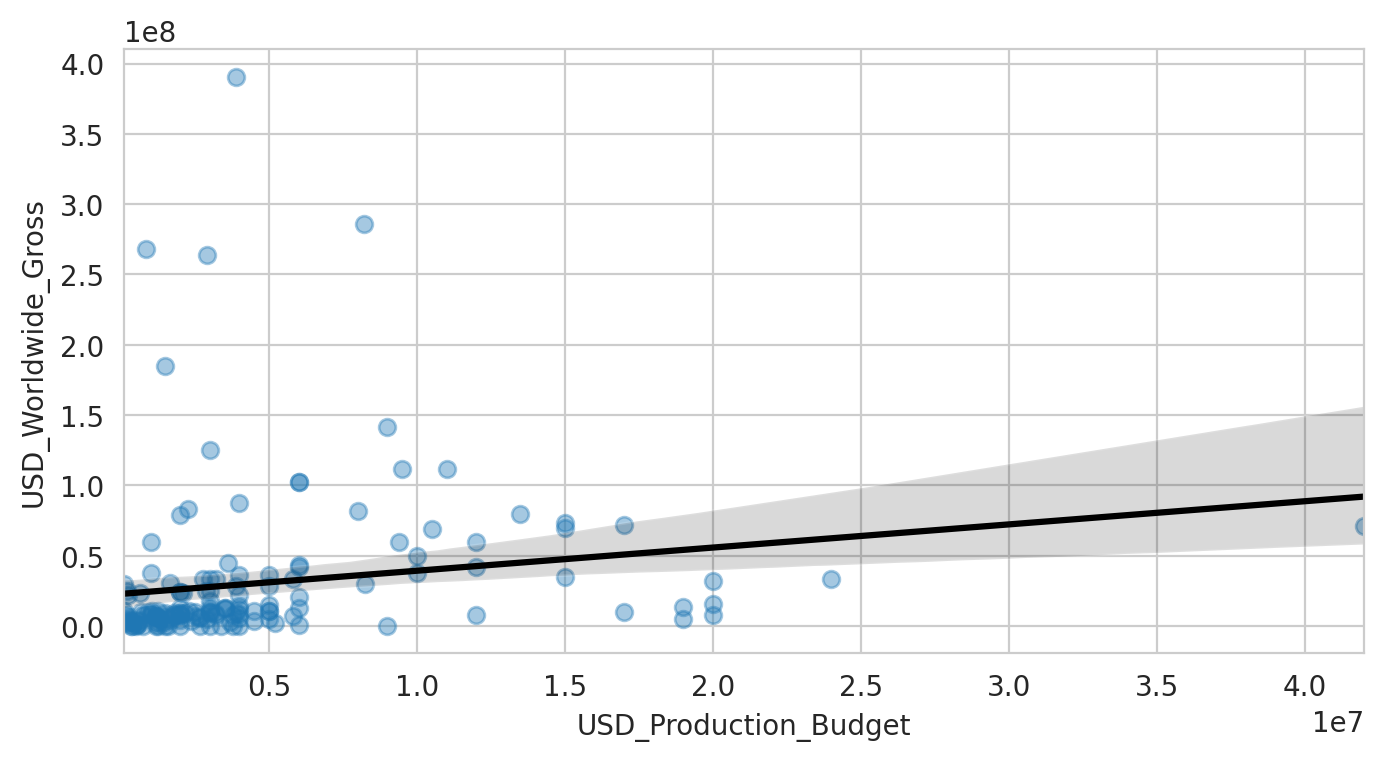

In [44]:
    plt.figure(figsize=(8,4), dpi=200)
    with sns.axes_style("whitegrid"):
      sns.regplot(data=old_films, 
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross',
                scatter_kws = {'alpha': 0.4},
                line_kws = {'color': 'black'})

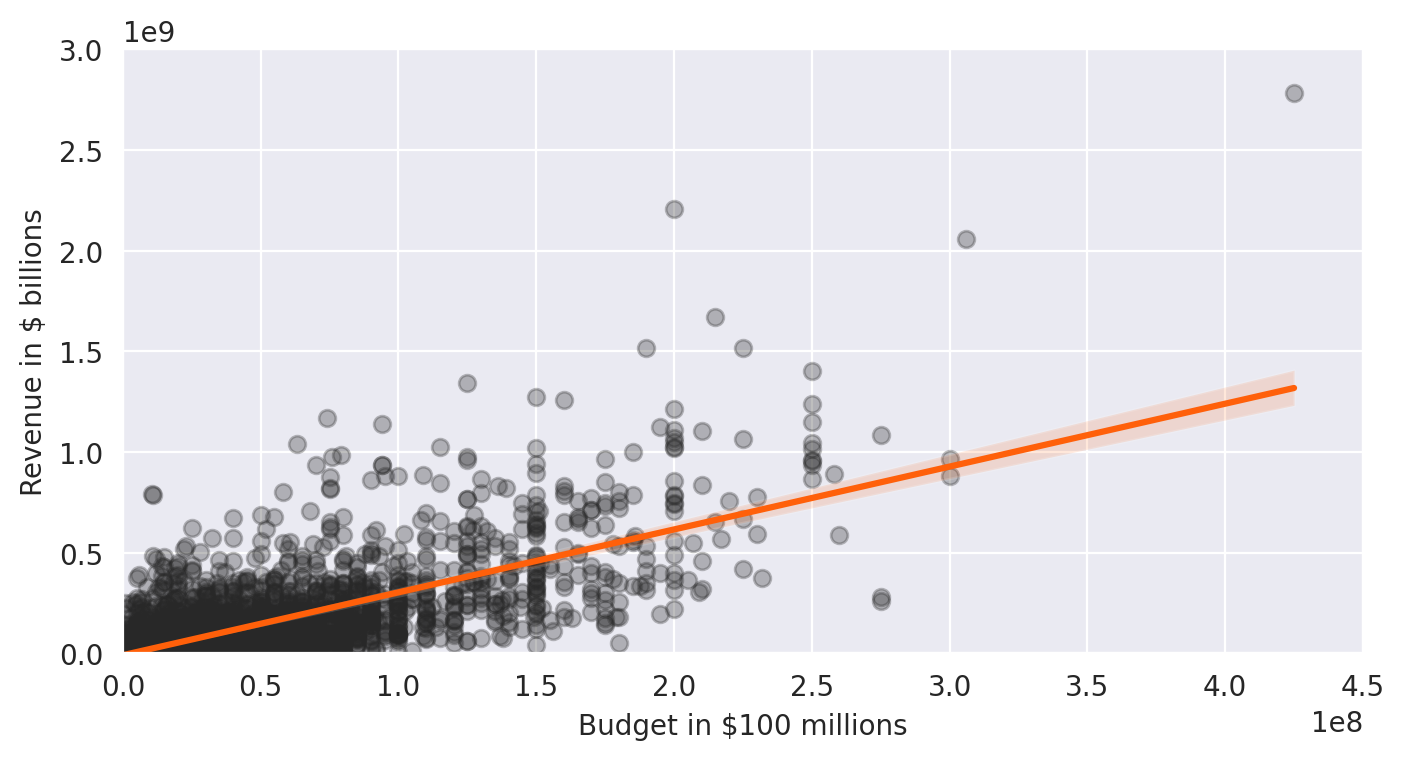

In [46]:
    plt.figure(figsize=(8,4), dpi=200)
    with sns.axes_style('darkgrid'):
      ax = sns.regplot(data=new_films,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       color='#282828',
                       scatter_kws = {'alpha': 0.3},
                       line_kws = {'color': '#ff600a'})
      
      ax.set(ylim=(0, 3000000000),
             xlim=(0, 450000000),
             ylabel='Revenue in $ billions',
             xlabel='Budget in $100 millions') 

In [48]:
regression = LinearRegression()

In [49]:
    # Explanatory Variable(s) or Feature(s)
    X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
     
    # Response Variable or Target
    y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [50]:
regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
regression.score(X, y)

0.5577032617720403

In [52]:
    budget = 350000000
    revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
    revenue_estimate = round(revenue_estimate, -6)
    print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
